# MACHINE LEARNING IN GEOSCIENCES

### Spatial models

<p> Mgr. Daniel Bicák <br>
<em>bicakd@natur.cuni.cz</em></p>
<p> 11.04.2022 </p>

### 1. Load data

<p>Load three different synthetic datasets, each of them has four features, two spatial covariates and independet variable. </p>

In [5]:
import pandas as pd
import numpy as np

In [295]:
# load first dataset "Alfa"
alfa = pd.read_csv('alfa.csv')
alfa.describe()

X             Y      Feature1      Feature2      Feature3  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       0.500000      0.500000     -0.381513     -0.125672      0.029995   
std        0.290129      0.291584      0.752338      2.165633      5.797397   
min        0.000000      0.000000    -10.647778    -25.871203    -29.313340   
25%        0.250000      0.250000     -0.470624     -0.560679     -2.038932   
50%        0.500000      0.500000     -0.103034     -0.014843      0.000000   
75%        0.750000      0.750000     -0.008141      0.329977      2.118505   
max        1.000000      1.000000      4.363178     23.265427     26.998668   

           Feature4             V  
count  20000.000000  20000.000000  
mean       0.000264     10.026638  
std        0.193272     29.422106  
min       -0.958485   -142.983188  
25%       -0.069075     -1.596218  
50%        0.000000      2.333219  
75%        0.067450     13.710300  
max        0.957041    236.854254

In [260]:
alfa.shape

(20000, 7)

In [309]:
# load second and third dataset "Bravo" and "Charlie"
bravo = pd.read_csv('Bravo.csv')
charlie = pd.read_csv('Charlie.csv')

### 2. Visualize data

In [261]:
# Visualize data with matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sbn

<AxesSubplot:>

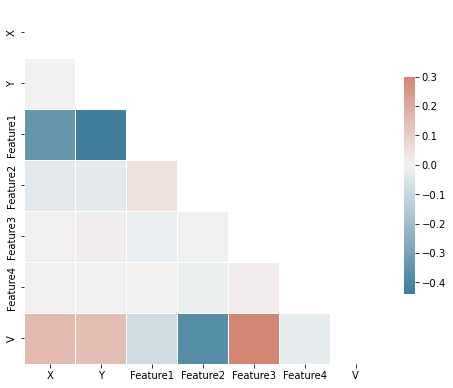

In [306]:
# correlation matrix
alfa_corr = alfa.corr()
mask = np.triu(np.ones_like(alfa_corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sbn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sbn.heatmap(alfa_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

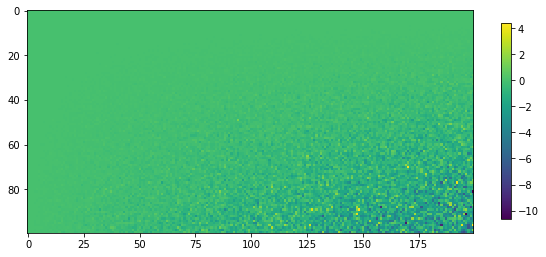

In [301]:
fig = plt.figure(figsize=(10, 18))
plot = fig.add_subplot(111)
img = plot.imshow(np.reshape(alfa.to_numpy()[:,2], (100, 200)), interpolation='none')
fig.colorbar(img, anchor=(0, 0.5), shrink=0.2)

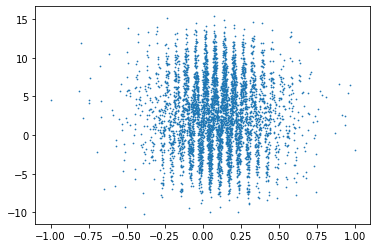

In [263]:
plt.scatter(charlie.to_numpy()[:,2], charlie.to_numpy()[:,-1], s=0.5)

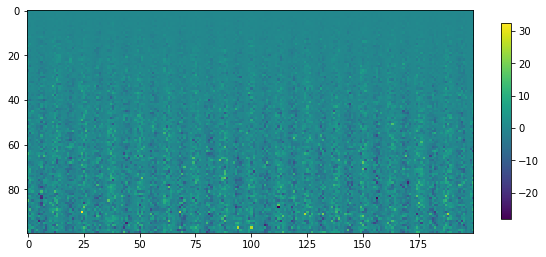

In [314]:
fig = plt.figure(figsize=(10, 18))
plot = fig.add_subplot(111)
img = plot.imshow(np.reshape(bravo.to_numpy()[:,3], (100, 200)), interpolation='none')
fig.colorbar(img, anchor=(0, 0.5), shrink=0.2)

### 3. Build machine learning models

In [315]:
# split data
from sklearn.model_selection import train_test_split

# features
alfa_x_features = alfa.to_numpy()[:,0:-1]

# dependent values
alfa_y = alfa.to_numpy()[:,-1]

# spliting the dataset
alfa_X_train, alfa_X_test, alfa_y_train, alfa_y_test = train_test_split(alfa_x_features, alfa_y, test_size=0.2, random_state=42)

<p> Formula for dependent variable for dataset alpha is; </p>
$$
V = \left ( 2x^2 + 2x \right )\left ( 4y^2 \right )\left ( 5f_{1} \right ) + \left ( -3x^2 - 3x \right )\left ( -2y^2 -6y\right )\left ( -5f_{2} \right ) + \left ( 6x \right )\left ( 5y\right )\left ( 4f^{2}_{3} + 4f_{3} \right ) +
\left ( -1x \right )\left ( -1y\right )\left ( -10f^{2}_{4} + -5f_{4} \right ) 
$$
<p>There is no noise. Therefore, sufficiently complex model can achieve error values close to zero. </p>

#### Linear regression

In [316]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


reg = linear_model.LinearRegression().fit(alfa_X_train, alfa_y_train)
pred = reg.predict(alfa_X_test)

print(f'RMSE is: {mean_squared_error(alfa_y_test, pred, squared=False)}')
print(f'Slope is: {reg.coef_}')
print(f'Intercept is: {reg.intercept_}')

RMSE is: 12.144133546698844
Slope is: [16.62159188 15.86794093  2.9176118  -5.02883296  4.04811994 -5.87090584]
Intercept is: -5.825022666229449


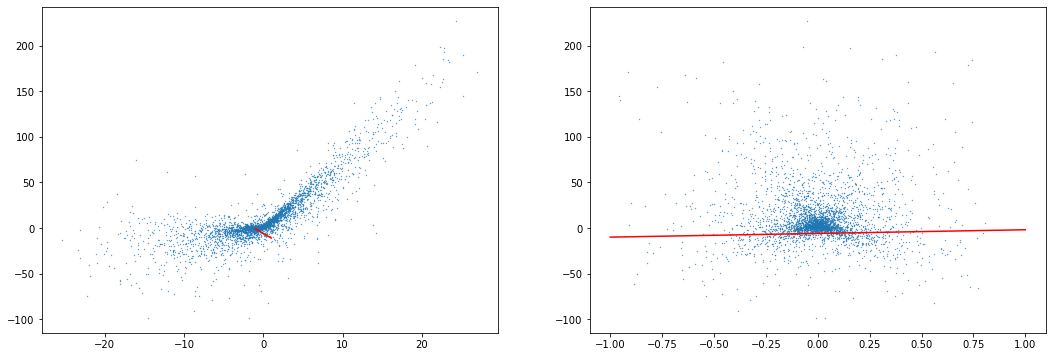

In [317]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.scatter(alfa_X_test[:,4], alfa_y_test, s=0.1)
xfit = np.linspace(-1, 1, 1000)
yfit = reg.coef_[3]*xfit + reg.intercept_
ax1.plot(xfit, yfit, c='red')

ax2.scatter(alfa_X_test[:,5], alfa_y_test, s=0.1)
xfit = np.linspace(-1, 1, 1000)
yfit = reg.coef_[4]*xfit + reg.intercept_
ax2.plot(xfit, yfit, c='red')

<em> Linear regression is not very effective... </em>

#### KNN

In [318]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

reg = KNeighborsRegressor(n_neighbors=10).fit(alfa_X_train, alfa_y_train)
pred = reg.predict(alfa_X_test)

print(f'RMSE is: {mean_squared_error(alfa_y_test, pred, squared=False)}')

RMSE is: 3.9366027028664745


####  Support Vector Machine

In [319]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

# linear SVM
reg = LinearSVR(tol=1e-2).fit(alfa_X_train, alfa_y_train)
pred = reg.predict(alfa_X_test)

print(f'RMSE is: {mean_squared_error(alfa_y_test, pred, squared=False)}')

RMSE is: 13.207057963953078


In [320]:
from sklearn.svm import SVR

# non-linear SVM
reg = SVR(C=10.0, epsilon=0.2).fit(alfa_X_train, alfa_y_train)
pred = reg.predict(alfa_X_test)

print(f'RMSE is: {mean_squared_error(alfa_y_test, pred, squared=False)}')

RMSE is: 3.9746440736551274


#### Ensembles

In [273]:
from sklearn.ensemble import RandomForestRegressor

# random forest
reg = RandomForestRegressor().fit(alfa_X_train, alfa_y_train)
pred  = reg.predict(alfa_X_test)

print(f'RMSE is: {mean_squared_error(alfa_y_test, pred, squared=False)}')

RMSE is: 3.302220718774291


In [274]:
from sklearn.ensemble import GradientBoostingRegressor

# gradient boosting
reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=0).fit(alfa_X_train, alfa_y_train)

pred  = reg.predict(alfa_X_test)
print(f'RMSE is: {mean_squared_error(alfa_y_test, pred, squared=False)}')

RMSE is: 2.044281913435742


### Local models

In [321]:
num = 5
dummy = []

for n in range(num):
    for m in range(num):
        
        a = 1/num
        
        y_value_max, y_value_min  = a + a*n, a*n
        x_value_max, x_value_min = a + a*n, a*n
        
        idx_x = np.argwhere((alfa_X_train[:, 0] >= x_value_min) & (alfa_X_train[:, 0] < x_value_max))
        idx_xy = np.argwhere((alfa_X_train[idx_x, 1] >= y_value_min) & (alfa_X_train[idx_x, 1] < y_value_max))
        
        reg = RandomForestRegressor().fit(alfa_X_train[idx_xy[:,0], :], alfa_y_train[idx_xy[:,0]])
        
        idx_x_t = np.argwhere((alfa_X_test[:, 0] >= x_value_min) & (alfa_X_test[:, 0] < x_value_max))
        idx_xy_t = np.argwhere((alfa_X_test[idx_x_t, 1] >= y_value_min) & (alfa_X_test[idx_x_t, 1] < y_value_max))
        
        pred = reg.predict(alfa_X_test[idx_xy_t[:,0]])

        length = idx_xy_t.shape[0]
        
        rmse = mean_squared_error(alfa_y_test[idx_xy_t[:,0]], pred, squared=False)
        dummy.append(rmse)
        
print(f'Average error for local models is {sum(dummy)/len(dummy)}')

Average error for local models is 7.3247837900025194


In [284]:
num = 5
dummy = []

for n in range(num):
    for m in range(num):
        
        a = 1/num
        
        y_value_max, y_value_min  = a + a*n, a*n
        x_value_max, x_value_min = a + a*n, a*n
        
        idx_x = np.argwhere((alfa_X_train[:, 0] >= x_value_min) & (alfa_X_train[:, 0] < x_value_max))
        idx_xy = np.argwhere((alfa_X_train[idx_x, 1] >= y_value_min) & (alfa_X_train[idx_x, 1] < y_value_max))
        
        reg = linear_model.LinearRegression().fit(alfa_X_train[idx_xy[:,0], :], alfa_y_train[idx_xy[:,0]])
        
        idx_x_t = np.argwhere((alfa_X_test[:, 0] >= x_value_min) & (alfa_X_test[:, 0] < x_value_max))
        idx_xy_t = np.argwhere((alfa_X_test[idx_x_t, 1] >= y_value_min) & (alfa_X_test[idx_x_t, 1] < y_value_max))
        
        pred = reg.predict(alfa_X_test[idx_xy_t[:,0]])

        length = idx_xy_t.shape[0]
        
        rmse = mean_squared_error(alfa_y_test[idx_xy_t[:,0]], pred, squared=False)
        dummy.append(rmse)
        
print(f'Average error for local models is {sum(dummy)/len(dummy)}')

Average error for local models is 13.15435542668383


### TRY FOR DIFFERENT DATASET

<p> Dataset bravo has bigger spatial auto-correlation and bit of noise (5%). Dataset Charlie has no spatial correlation and small amount of noise (10 %) </p>